In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.colors as mcolors
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score, silhouette_samples
from scipy.cluster.hierarchy import dendrogram

In [6]:
def plot_data(x, y):
    plt.figure(figsize=(8, 6))
    plt.scatter(x, y, s=50)
    plt.xlabel('V1')
    plt.ylabel('V2')
    plt.show()

In [7]:
def plot_clusters(data, num_clusters, title):
    colors = list(mcolors.TABLEAU_COLORS.keys())

    for k in range(num_clusters):
        rows = np.where(data[:, 2] == k)
        
        plt.scatter(data[rows][:, 0], data[rows][:, 1], label='Cluster {}'.format(k+1), color=colors[k])
    plt.legend()
    plt.xlabel('V1')
    plt.ylabel('V2')
    plt.title(title)
    plt.show()

In [8]:
def plot_silhouette_values(data, num_clusters, labels):
    sample_silhouette_values = silhouette_samples(data, labels)
    y_lower = 10
    for i in range(num_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = plt.cm.nipy_spectral(float(i) / num_clusters)
        plt.fill_betweenx(
            np.arange(y_lower, y_upper), 
            0, 
            ith_cluster_silhouette_values, 
            facecolor=color, 
            edgecolor=color, 
            alpha=0.7
        )
        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10
    plt.title(f"Num Clusters: {num_clusters}")
    plt.show()

## Define Hierarchical Clustering

In [17]:
def evaluate_hierarchical_clustering(data, num_clusters, metric="silhouette"):
    hierarchical_best_params = {"k": 0, "score": 0, "labels": None}
    score_history = {}

    if metric == 'davies_bouldin':
        hierarchical_best_params['score'] = 1000
    if metric == 'silhouette':
        hierarchical_best_params['score'] = -1000
    
    for k in num_clusters:
        hierarchical = AgglomerativeClustering(n_clusters=k, compute_distances=True)
        y_pred = hierarchical.fit_predict(data)

        if metric == 'davies_bouldin':
            score = davies_bouldin_score(data, y_pred)
            print(f"K: {k}, Score: {score:.2f}")
            if score < hierarchical_best_params["score"]:
                hierarchical_best_params["k"] = k
                hierarchical_best_params["score"] = score
                hierarchical_best_params["labels"] = y_pred
            
        if metric == 'silhouette':
            score = silhouette_score(data, y_pred)
            plot_silhouette_values(data, k, y_pred)
            if score > hierarchical_best_params["score"]:
                hierarchical_best_params["k"] = k
                hierarchical_best_params["score"] = score
                hierarchical_best_params["labels"] = y_pred
        
        score_history[k] = score
    
    # Plot the score history
    plt.plot(list(score_history.keys()), list(score_history.values()))
    plt.xlabel('Num Clusters')
    plt.ylabel('Score')
    plt.show()
        
    return hierarchical_best_params, score_history

In [29]:
def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count
    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)
    dendrogram(linkage_matrix, **kwargs)
    
    plt.title('Hierarchical Clustering Dendrogram')
    plt.xlabel("Number of points in node")
    plt.show()

## First Dataset

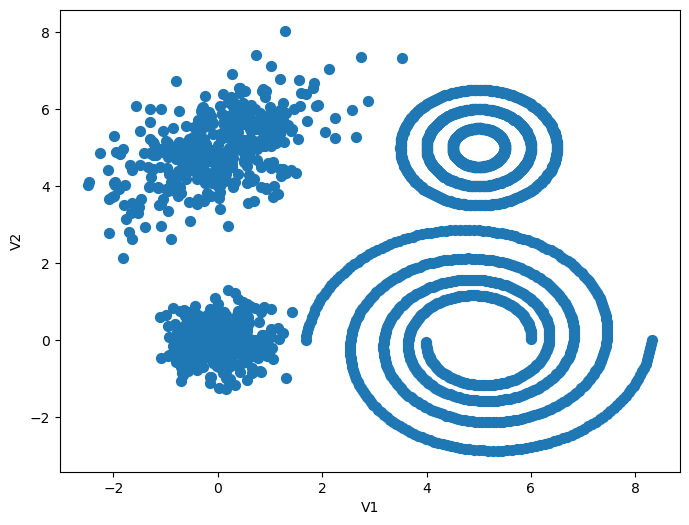

In [19]:
data_one = np.genfromtxt('donclassif.csv', delimiter=';')
data_one = np.delete(data_one, 0, 0)
plot_data(data_one[:, 0], data_one[:, 1])

### Find Number of Clusters using Silhouette metric

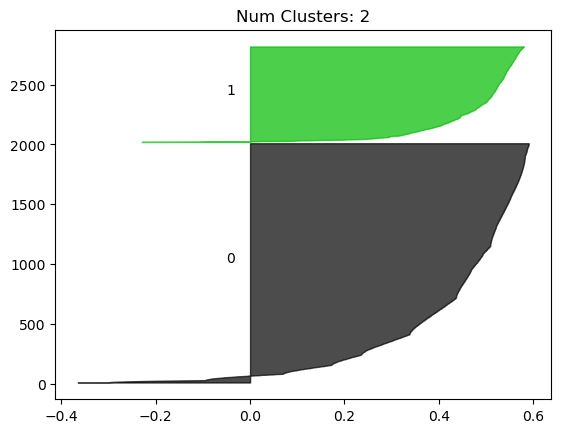

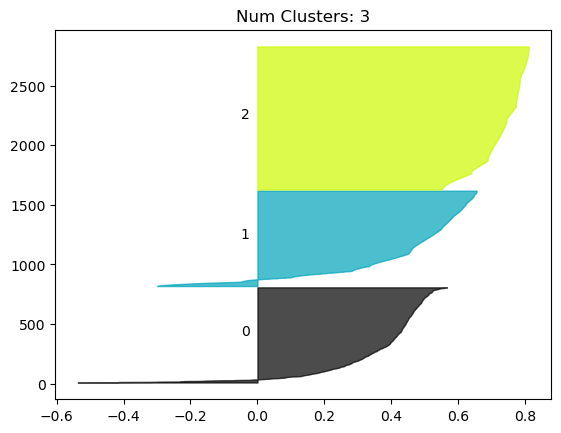

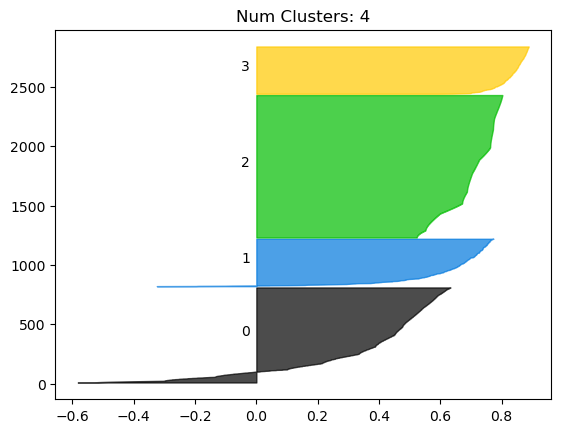

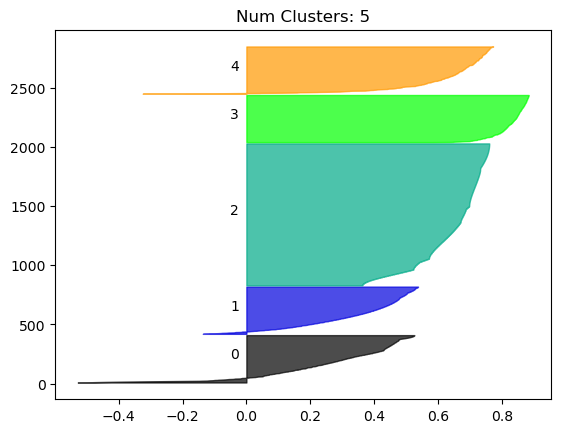

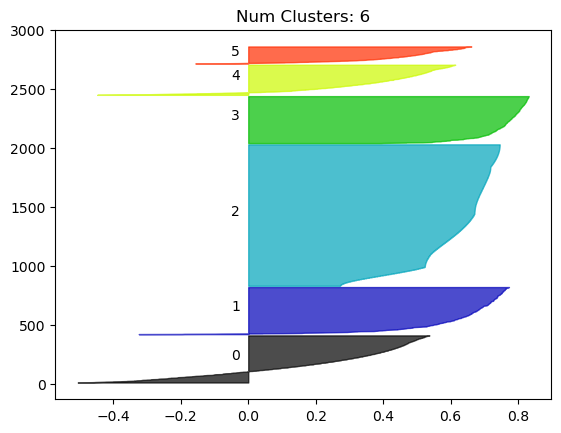

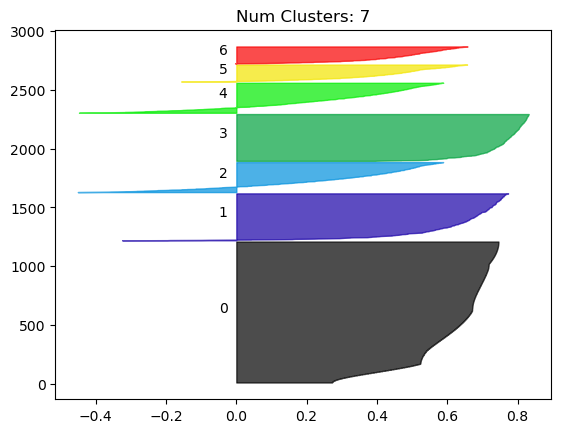

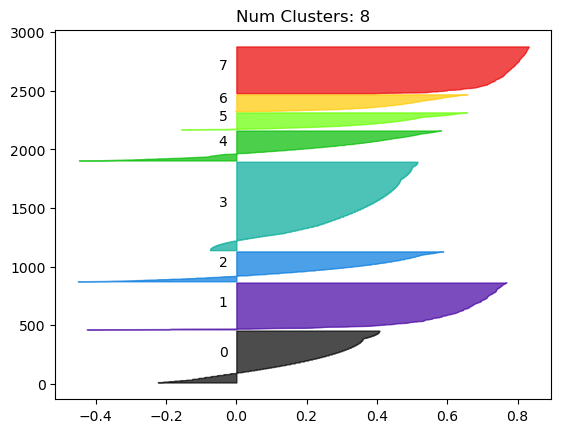

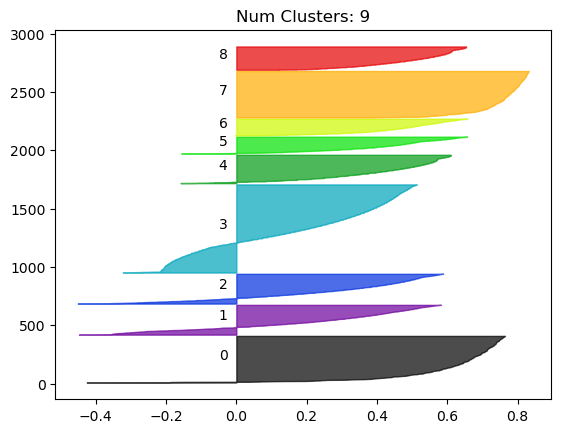

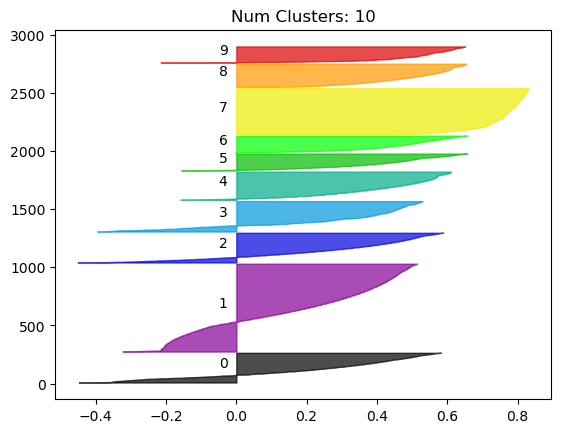

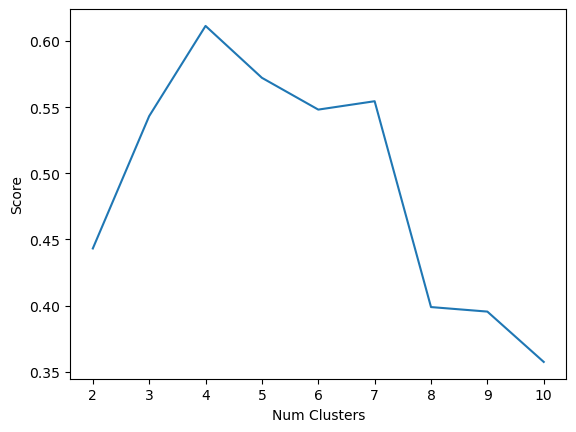

{'k': 4, 'score': 0.6113849517148702, 'labels': array([0, 0, 0, ..., 1, 1, 1])}

In [24]:
num_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
hierarchical_best_params, hierarchical_history = evaluate_hierarchical_clustering(data_one, num_clusters=num_clusters, metric='silhouette')
hierarchical_best_params

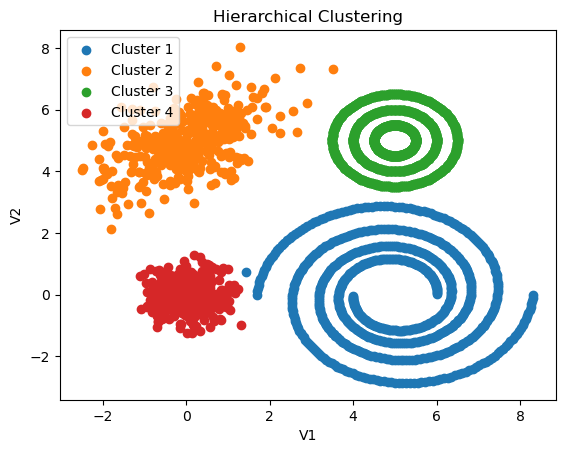

In [25]:
result_data_one = np.concatenate((data_one, hierarchical_best_params['labels'].reshape(-1, 1)), axis=1)
plot_clusters(result_data_one, hierarchical_best_params['k'], 'Hierarchical Clustering')

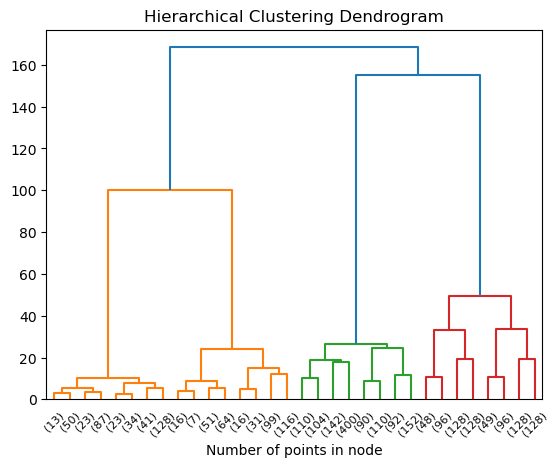

In [32]:
model = AgglomerativeClustering(n_clusters=hierarchical_best_params["k"], compute_distances=True)
model.fit(data_one)
plot_dendrogram(model, truncate_mode='level', p=4)

### Find Number of Clusters using Daives Bouldin metric

K: 2, Score: 1.06
K: 3, Score: 0.77
K: 4, Score: 0.53
K: 5, Score: 0.78
K: 6, Score: 0.70
K: 7, Score: 0.67
K: 8, Score: 0.90
K: 9, Score: 0.79
K: 10, Score: 0.85


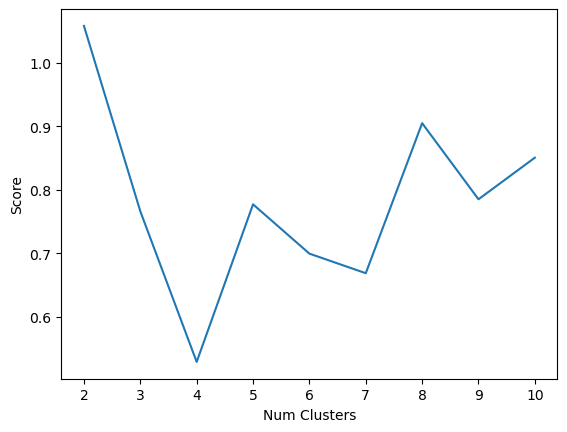

{'k': 4, 'score': 0.5294184767061443, 'labels': array([0, 0, 0, ..., 1, 1, 1])}

In [33]:
num_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
hierarchical_best_params, hierarchical_history = evaluate_hierarchical_clustering(data_one, num_clusters=num_clusters, metric='davies_bouldin')
hierarchical_best_params

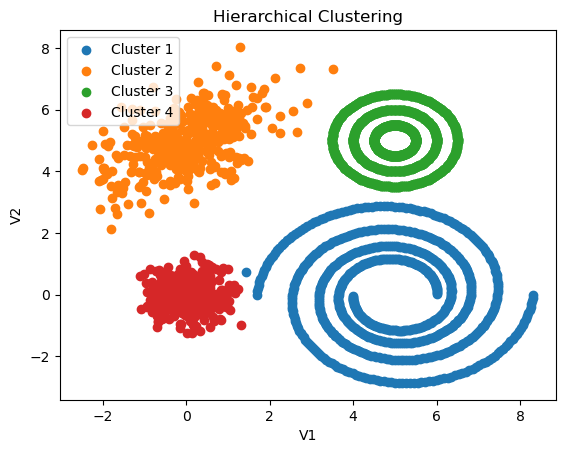

In [34]:
result_data_one = np.concatenate((data_one, hierarchical_best_params['labels'].reshape(-1, 1)), axis=1)
plot_clusters(result_data_one, hierarchical_best_params['k'], 'Hierarchical Clustering')

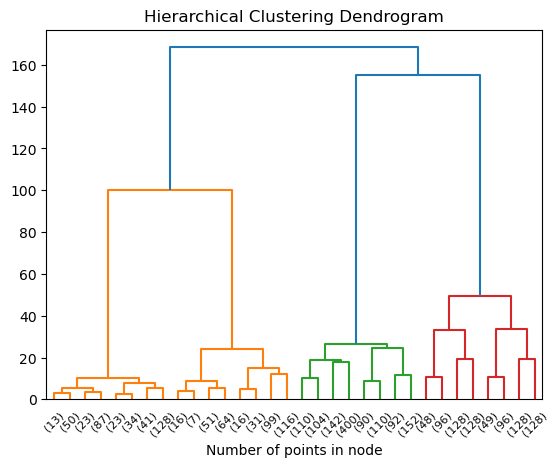

In [35]:
model = AgglomerativeClustering(n_clusters=hierarchical_best_params["k"], compute_distances=True)
model.fit(data_one)
plot_dendrogram(model, truncate_mode='level', p=4)

## Second Dataset

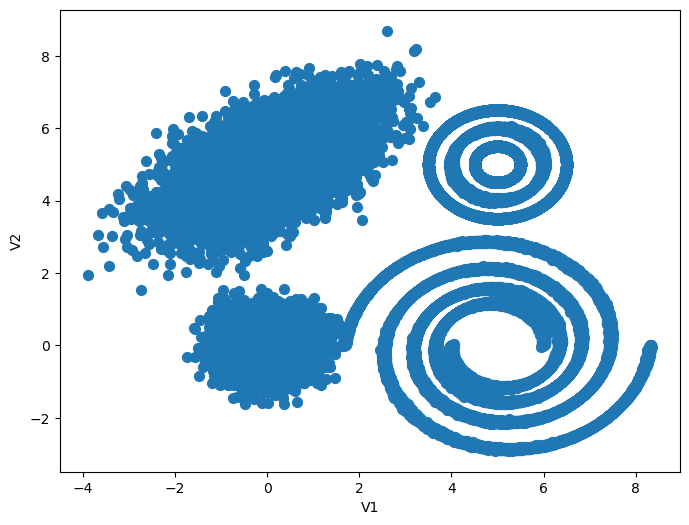

In [31]:
data_two = np.genfromtxt('donclassif2.csv', delimiter=';')
data_two = np.delete(data_two, 0, 0)
plot_data(data_two[:, 0], data_two[:, 1])

reduce the number of samples to 500 using kmeans

In [37]:
kmeans = KMeans(n_clusters=500, random_state=42).fit(data_two)
reduced_data_two = kmeans.cluster_centers_

### Find Number of Clusters using Silhouette metric

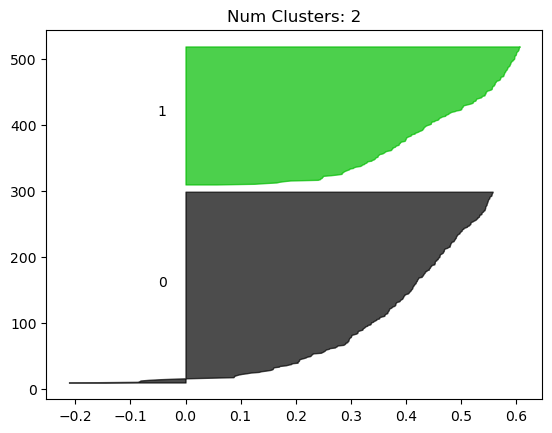

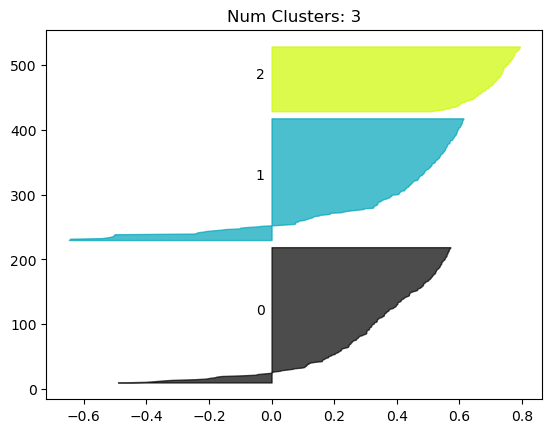

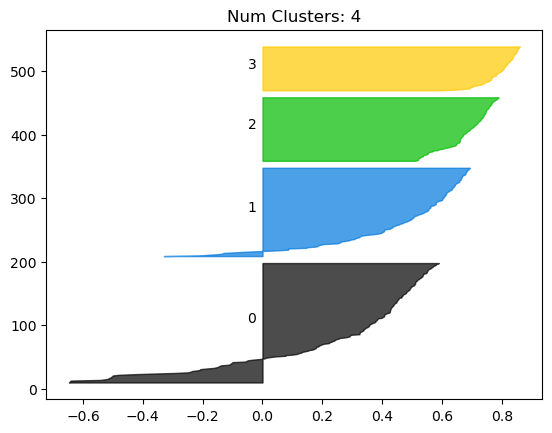

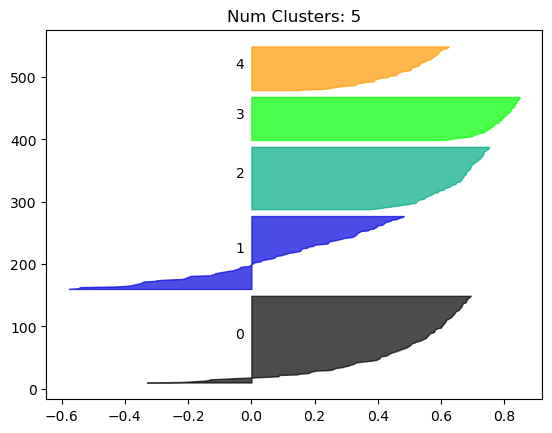

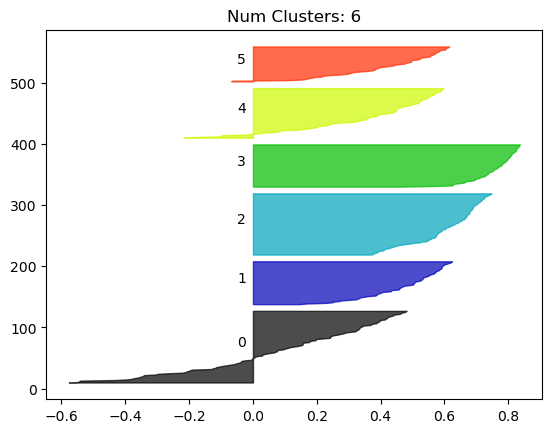

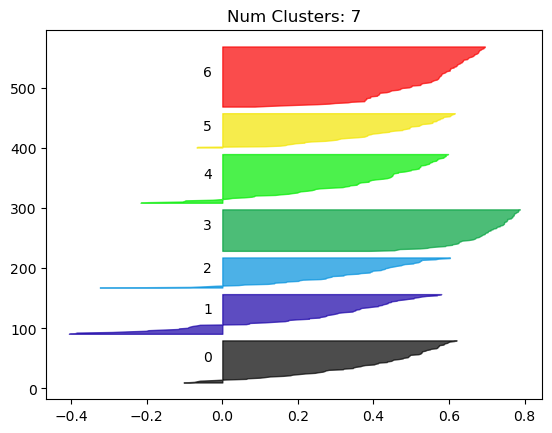

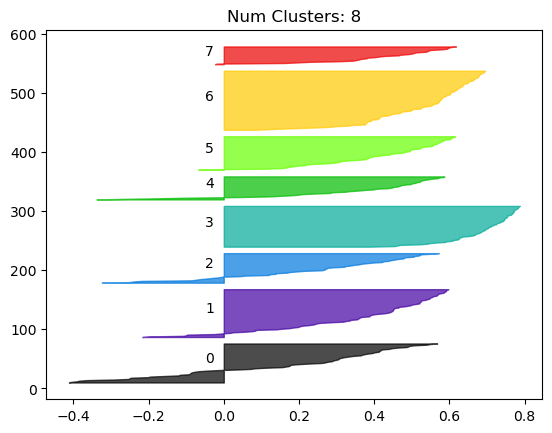

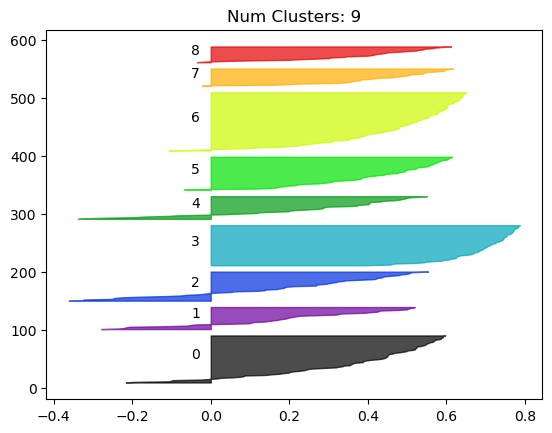

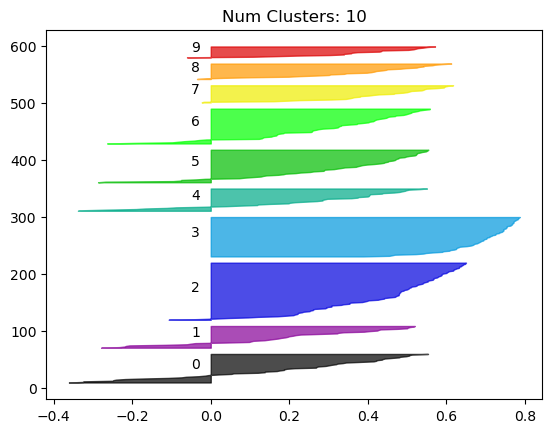

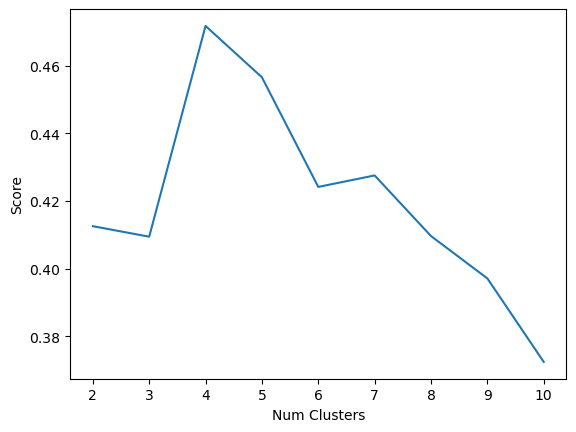

{'k': 4,
 'score': 0.47176075967629627,
 'labels': array([1, 2, 0, 3, 0, 1, 2, 1, 0, 0, 2, 2, 0, 0, 0, 0, 2, 1, 0, 2, 3, 0,
        2, 2, 0, 1, 0, 1, 2, 3, 1, 0, 0, 0, 3, 2, 0, 2, 1, 0, 0, 0, 0, 0,
        2, 2, 3, 2, 0, 0, 3, 2, 2, 0, 1, 3, 0, 0, 0, 0, 1, 3, 0, 0, 0, 2,
        1, 0, 2, 1, 1, 0, 2, 0, 1, 2, 1, 1, 2, 3, 0, 0, 2, 0, 0, 0, 1, 0,
        0, 1, 0, 0, 0, 1, 2, 2, 2, 2, 2, 2, 1, 0, 3, 0, 0, 1, 2, 0, 3, 1,
        3, 0, 2, 0, 2, 2, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 3, 0, 1, 2, 2, 1,
        0, 2, 1, 0, 2, 0, 1, 1, 0, 0, 3, 1, 0, 1, 1, 3, 1, 1, 1, 1, 3, 2,
        2, 0, 1, 0, 1, 0, 0, 0, 2, 0, 0, 3, 3, 0, 3, 3, 1, 0, 1, 0, 0, 1,
        0, 2, 1, 1, 0, 2, 0, 3, 2, 0, 0, 2, 0, 1, 0, 0, 0, 0, 2, 3, 2, 3,
        3, 2, 1, 3, 0, 2, 0, 2, 0, 3, 2, 2, 0, 1, 0, 0, 0, 0, 1, 1, 2, 0,
        1, 0, 0, 1, 2, 1, 1, 0, 0, 0, 0, 2, 0, 0, 2, 1, 1, 0, 0, 3, 2, 0,
        1, 3, 0, 1, 1, 2, 0, 0, 3, 0, 1, 0, 1, 1, 2, 2, 1, 0, 1, 0, 0, 3,
        3, 2, 3, 0, 0, 3, 1, 2, 2, 1, 0, 2, 2, 0, 0, 3, 0, 0, 

In [38]:
num_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
hierarchical_best_params, hierarchical_history = evaluate_hierarchical_clustering(reduced_data_two, num_clusters=num_clusters, metric='silhouette')
hierarchical_best_params

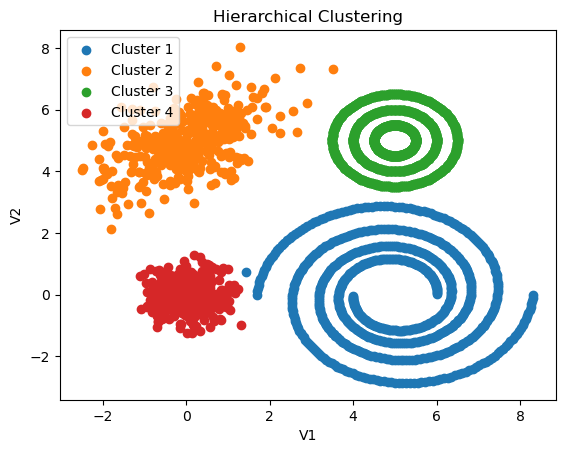

In [40]:
result_reduced_data_two = np.concatenate((reduced_data_two, hierarchical_best_params['labels'].reshape(-1, 1)), axis=1)
plot_clusters(result_reduced_data_two, hierarchical_best_params['k'], 'Hierarchical Clustering')

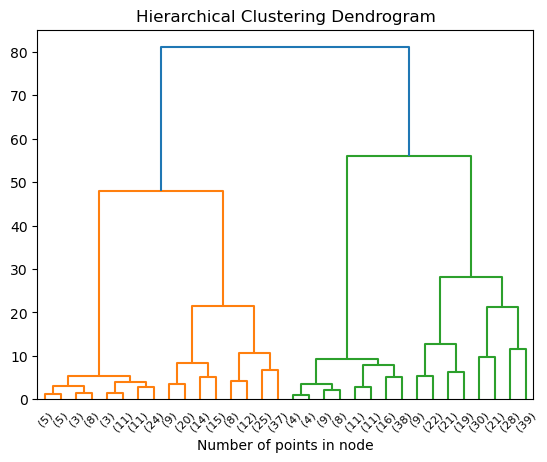

In [41]:
model = AgglomerativeClustering(n_clusters=hierarchical_best_params["k"], compute_distances=True)
model.fit(reduced_data_two)
plot_dendrogram(model, truncate_mode='level', p=4)

### Find Number of Clusters using Daives Bouldin metric

K: 2, Score: 1.05
K: 3, Score: 0.77
K: 4, Score: 0.62
K: 5, Score: 0.80
K: 6, Score: 0.85
K: 7, Score: 0.82
K: 8, Score: 0.84
K: 9, Score: 0.85
K: 10, Score: 0.87


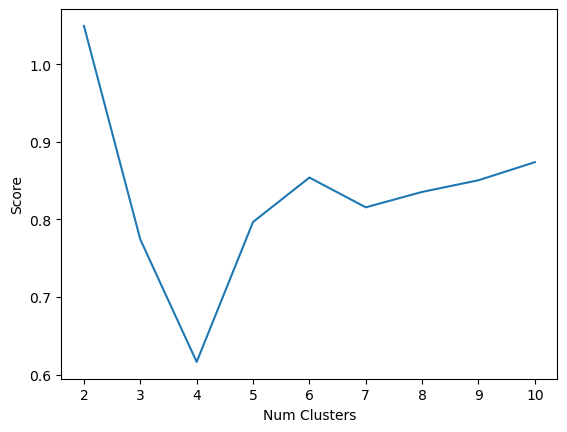

{'k': 4,
 'score': 0.6163611888291003,
 'labels': array([1, 2, 0, 3, 0, 1, 2, 1, 0, 0, 2, 2, 0, 0, 0, 0, 2, 1, 0, 2, 3, 0,
        2, 2, 0, 1, 0, 1, 2, 3, 1, 0, 0, 0, 3, 2, 0, 2, 1, 0, 0, 0, 0, 0,
        2, 2, 3, 2, 0, 0, 3, 2, 2, 0, 1, 3, 0, 0, 0, 0, 1, 3, 0, 0, 0, 2,
        1, 0, 2, 1, 1, 0, 2, 0, 1, 2, 1, 1, 2, 3, 0, 0, 2, 0, 0, 0, 1, 0,
        0, 1, 0, 0, 0, 1, 2, 2, 2, 2, 2, 2, 1, 0, 3, 0, 0, 1, 2, 0, 3, 1,
        3, 0, 2, 0, 2, 2, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 3, 0, 1, 2, 2, 1,
        0, 2, 1, 0, 2, 0, 1, 1, 0, 0, 3, 1, 0, 1, 1, 3, 1, 1, 1, 1, 3, 2,
        2, 0, 1, 0, 1, 0, 0, 0, 2, 0, 0, 3, 3, 0, 3, 3, 1, 0, 1, 0, 0, 1,
        0, 2, 1, 1, 0, 2, 0, 3, 2, 0, 0, 2, 0, 1, 0, 0, 0, 0, 2, 3, 2, 3,
        3, 2, 1, 3, 0, 2, 0, 2, 0, 3, 2, 2, 0, 1, 0, 0, 0, 0, 1, 1, 2, 0,
        1, 0, 0, 1, 2, 1, 1, 0, 0, 0, 0, 2, 0, 0, 2, 1, 1, 0, 0, 3, 2, 0,
        1, 3, 0, 1, 1, 2, 0, 0, 3, 0, 1, 0, 1, 1, 2, 2, 1, 0, 1, 0, 0, 3,
        3, 2, 3, 0, 0, 3, 1, 2, 2, 1, 0, 2, 2, 0, 0, 3, 0, 0, 1

In [42]:
num_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
hierarchical_best_params, hierarchical_history = evaluate_hierarchical_clustering(reduced_data_two, num_clusters=num_clusters, metric='davies_bouldin')
hierarchical_best_params

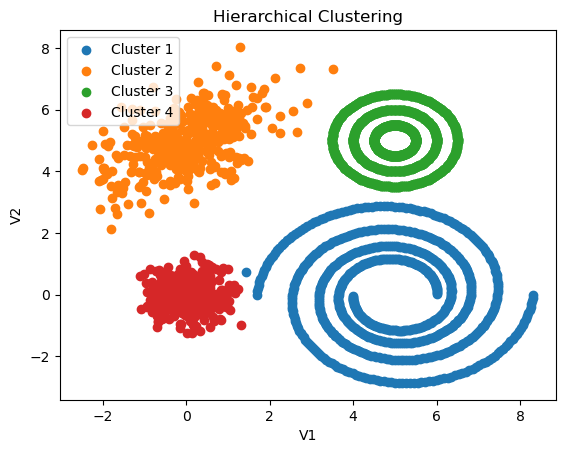

In [43]:
result_reduced_data_two = np.concatenate((reduced_data_two, hierarchical_best_params['labels'].reshape(-1, 1)), axis=1)
plot_clusters(result_reduced_data_two, hierarchical_best_params['k'], 'Hierarchical Clustering')

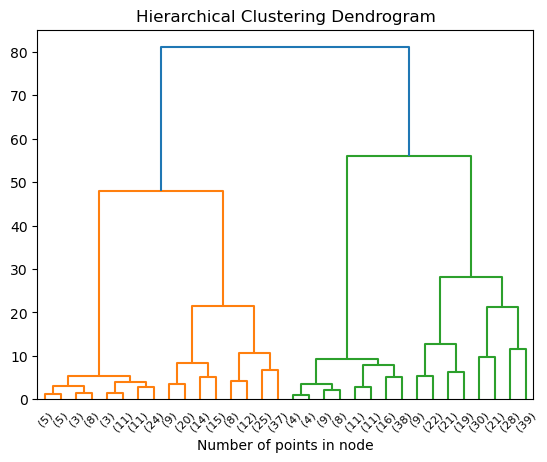

In [44]:
model = AgglomerativeClustering(n_clusters=hierarchical_best_params["k"], compute_distances=True)
model.fit(reduced_data_two)
plot_dendrogram(model, truncate_mode='level', p=4)